# 3.2 The Bias-Varaince Decomposition


1. 从前文中我们可以看到，当我们限制了基函数的数量以避免过拟合的时候，会给模型带来相应的副作用，也就是限制了模型的灵活程度，例如，如果数据本来是二次或者更高次的模型，而强行用线性模型，不能反应数据的真实规律。

2. 正则化参数$\lambda$ 虽然能够限制过拟合的发生，但是又增加了$\lambda$ 的确定的难度。而显然$\lambda$ 需要在模型确定的同时给出，而不是作为模型求解的参数用数据求解。

3. 由于过拟合现象仅在最大似然方法中出现，而在贝叶斯方法中不可能出现（在贝叶斯方法中，先验分布相当于最大似然方法中的正则化项），本节将先从频率学的角度出发去理解贝叶斯方法的模型复杂度。

4. 在前文的决策理论中，我们发现采用不同的误差函数得到的最佳预测会有差异，而比较通用的误差函数一般选择二次误差函数，这时的最佳预测结果也就是条件期望：
$$
h\left(\mathbf{x}\right) = \mathbb{E}\left[t| \mathbf{x}\right]= \int t p\left(t| \mathbf{x}\right)dt
$$

5. 从决策理论出发得到的二次损失函数和从最大似然方法得到的平方和误差函数的出发点是有差异的，在决策理论中，我们可能会用到更为复杂的技术来计算结果，比如正则化方法以及贝叶斯方法，甚至他们与二次损失函数的结合来确定条件分布$ p\left(t| \mathbf{x}\right)$.

6. 前文中，我们已经证明，二次误差函数的希望可以表示为模型的误差和数据的误差：
  $$
  \mathbb{E}\left[L\right] = \int \{y\left(\mathbf{x}- h\left(\mathbf{x}\right)\right)^2 p\left(\mathbf{x}\right)\}d\mathbf{x} +  \int \{h\left(\mathbf{x}- t\right)^2 p\left(\mathbf{x},t\right)\}d\mathbf{x}dt
  $$
  其中第二项与模型无关，单纯由于数据内部的误差带来的。第一项依赖于我们模型$y\left(\mathbf{x}\right)$的选择.
  决策理论的流程是：
    1. 确定条件分布！
    2. 确定损失函数；
    3. 根据损失函数确定决策函数（预测函数），一般的如果选择二次损失函数，那么就可以得到最佳的分类函数y(x)恰好等于条件概率函数h(x);

注：因为回归（分类）损失函数可以分类两部分，后面部分是由于原始数据是有限的，所以我们对于联合分布函数的计算（预测） 并不十分准确，后面的误差正是由于这种不准确带来的。

7. 对于前面的第一项，由于$x$的也不是全体，因此这部分的误差也因数据而异：
    $$
        \mathbb{E}_{\mathcal{D}}\left[y\left(\mathbf{x}; \mathcal{D}\right)-h\left(\mathbf{x}\right)^2\right] \\
        =\{\mathbb{E}_{\mathcal{D}}\left[y\left(\mathbf{x}; \mathcal{D}\right)\right]-h\left(\mathbf{x}\right)\}^2 + \mathbb{E}_{\mathcal{D}}\left[\{y\left(\mathbf{x}; \mathcal{D}\right) \mathbb{E}_{\mathcal{D}}\left[y\left(\mathbf{x}; \mathcal{D}\right)\right]\}^2\right]
    $$
    其中第一项由于模型的选择带来的误差，第二项由于数据不全（仅能得到部分数据，数据的全体分布未知）。第一项称为**bias**,第二项称为**variance**

8. 期望误差表示为：
      $$
       expected loss = \left(bias\right)^2 + variance + noise
      $$
   其中
     $$
       bias^2 = \int \{\mathbb{E}_{\mathcal{D}}\left[y\left(\mathbf{x}; \mathcal{D}\right)\right]-h\left(\mathbf{x}\right)\}^2 p\left(\mathbf{x}\right)d\mathbf{x}\\
       vaiance =\int  \mathbb{E}_{\mathcal{D}}\left[\{y\left(\mathbf{x}; \mathcal{D}\right) -\mathbb{E}_{\mathcal{D}}\left[y\left(\mathbf{x}; \mathcal{D}\right)\right]\}^2\right]p\left(\mathbf{x}\right)d\mathbf{x}\\
       noise = \int\{h\left(\mathbf{x}\right)-t\}^2\left(\mathbf{x},t\right)d\mathbf{x}dt
      $$

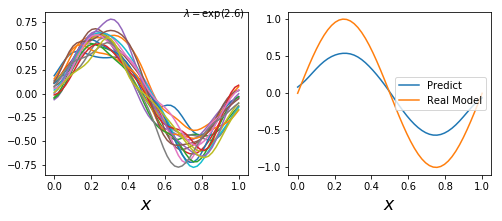

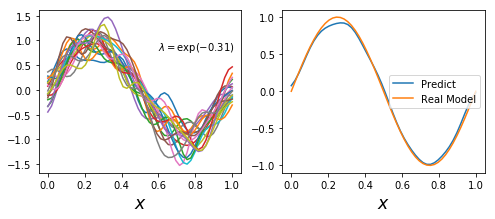

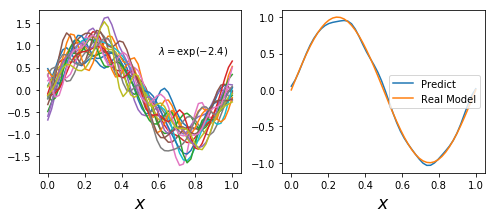

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 28 20:37:21 2018

@author: Liu-pc
"""

import numpy as np
import math
import matplotlib.pyplot as plt
size_s, size_n = 100,50;
data_x_mat = np.linspace(0,1,50);
data_x_mat_noNoise = np.sin(data_x_mat*2*math.pi);
data_y_mat = np.sin(data_x_mat*2*math.pi) + 0.5*np.random.randn(size_s,size_n);

#plt.plot(data_x_mat,data_y_mat[0,:] )

def Cal_Phi_x(x,M):
    Phi_x = np.ones(np.size(x));
    sigma = 0.05;
    mu = np.linspace(0,1,M);
    for i in mu:
        Phi_x = np.c_[Phi_x, np.exp(-(x-i)**2/2/sigma**2)]
    return Phi_x
M = 25;
Phi = Cal_Phi_x(data_x_mat,M);
# 第一种情况
lambda_reg = np.exp(2.6)*np.eye(M+1, dtype=int)  ;
W = np.dot(np.dot(np.linalg.inv((lambda_reg+np.dot(Phi.transpose(), Phi))),Phi.transpose()),data_y_mat.transpose());
y_predict = np.dot(Phi, W);
#plt.plot(data_x_mat,y_predict[:,1:20]);
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.plot(data_x_mat,y_predict[:,1:20],label='Predict');
ax2.plot(data_x_mat,np.mean(y_predict,1),data_x_mat,data_x_mat_noNoise)
ax2.legend(['Predict','Real Model'],loc='right');
ax1.text(0.7,0.8, r'$\lambda = \exp(2.6)$')
ax1.set_xlabel(r'$x$', fontsize="xx-large")
ax2.set_xlabel(r'$x$', fontsize="xx-large")
plt.show();

# 第二种情况
lambda_reg = np.exp(-0.31)*np.eye(M+1, dtype=int)  ;
W = np.dot(np.dot(np.linalg.inv((lambda_reg+np.dot(Phi.transpose(), Phi))),Phi.transpose()),data_y_mat.transpose());
y_predict = np.dot(Phi, W);
#plt.plot(data_x_mat,y_predict[:,1:20]);
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.plot(data_x_mat,y_predict[:,1:20],label='Predict');
ax2.plot(data_x_mat,np.mean(y_predict,1),data_x_mat,data_x_mat_noNoise)
ax2.legend(['Predict','Real Model'],loc='right');
ax1.text(0.6,0.8, r'$\lambda = \exp(-0.31)$')
ax1.set_xlabel(r'$x$', fontsize="xx-large")
ax2.set_xlabel(r'$x$', fontsize="xx-large")
plt.show();
# 第三种情况
lambda_reg = np.exp(-2.4)*np.eye(M+1, dtype=int)  ;
W = np.dot(np.dot(np.linalg.inv((lambda_reg+np.dot(Phi.transpose(), Phi))),Phi.transpose()),data_y_mat.transpose());
y_predict = np.dot(Phi, W);
#plt.plot(data_x_mat,y_predict[:,1:20]);
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.plot(data_x_mat,y_predict[:,1:20],label='Predict');
ax2.plot(data_x_mat,np.mean(y_predict,1),data_x_mat,data_x_mat_noNoise)
ax2.legend(['Predict','Real Model'],loc='right');
ax1.text(0.6,0.8, r'$\lambda = \exp(-2.4)$')
ax1.set_xlabel(r'$x$', fontsize="xx-large")
ax2.set_xlabel(r'$x$', fontsize="xx-large")
plt.show();

1. 上图中，左边表示在取正则化参数$\lambda$为不同值时,采用$M= 25$个高斯基函数的回归结果。（由于原始数据加了噪声，不同次仿真下的回归$y^l\left(\mathbf{x}\right)$）， 右侧指左侧多次仿真结果的平均结果$\bar{y}\left(\mathbf{x}\right)$与原始数据模型 $h\left(\mathbf{x}\right)$的对比。
    $$
    \begin{align}
      \bar{y}\left(x\right) & = \frac{1}{L}\sum_{l=1}^L y^l\left(\mathbf{x}\right)\\
      \left(bias\right)^2 & =\frac{1}{N}\sum_{l=1}^N \{\bar{y}\left(x_n\right) -h\left(x_n\right)\}^2 \\
      variance & = \frac{1}{N}\sum_{l=1}^N  \frac{1}{L}\sum_{l=1}^L\{y^l\left(x_n\right)-\bar{y}\left(x_n\right)\}^2 \\
      noise &= \frac{1}{N}\sum_{l=1}^N \{t_n -h\left(x_n\right)\}^2 
     \end{align}
    $$

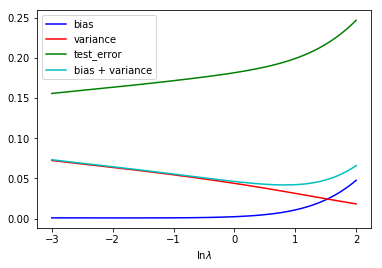

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 22 22:31:19 2018

@author: Liu-pc
"""

# -*- coding: utf-8 -*-
"""
Created on Wed Feb 28 20:37:21 2018

@author: Liu-pc
"""

import numpy as np
import math
import matplotlib.pyplot as plt
size_s, size_n = 100,50;
data_x_mat = np.linspace(0,1,50);
data_x_mat_noNoise = np.sin(data_x_mat*2*math.pi);
data_y_mat = np.sin(data_x_mat*2*math.pi) + 0.5*np.random.randn(size_s,size_n);

#plt.plot(data_x_mat,data_y_mat[0,:] )

def Cal_Phi_x(x,M):
    Phi_x = np.ones(np.size(x));
    sigma = 0.05;
    mu = np.linspace(0,1,M);
    for i in mu:
        Phi_x = np.c_[Phi_x, np.exp(-(x-i)**2/2/sigma**2)]
    return Phi_x
M = 25;
Phi = Cal_Phi_x(data_x_mat,M);
# 第一种情况
lambda_mat = np.linspace(np.exp(-3), np.exp(2),50);
bias = np.zeros((50,1)); 
variance = np.zeros((50,1));
test_error = np.zeros((50,1));
i = 0;
for lambda_a in lambda_mat:
  lambda_reg = lambda_a*np.eye(M+1, dtype=int)  ;
  W = np.dot(np.dot(np.linalg.inv((lambda_reg+np.dot(Phi.transpose(), Phi))),Phi.transpose()),data_y_mat.transpose());
  y_predict = np.dot(Phi, W);  
  bias[i,0] = np.mean((np.mean(y_predict,1)-data_x_mat_noNoise)**2);
  mean_y_pre_mat =  np.tile(np.mean(y_predict,1),  (np.size(y_predict,1),1))
  variance[i,0] = np.sum(np.sum((y_predict-mean_y_pre_mat.transpose())**2))/y_predict.size;
  test_error[i,0] = np.sum(np.sum((y_predict-data_y_mat.transpose())**2))/y_predict.size;
  i=i+1;

lambda_mat = lambda_mat.reshape(50,1)
plt.plot(np.log(lambda_mat), bias,'b-',label='bias');
plt.plot(np.log(lambda_mat), variance,'r-', label = 'variance');
plt.plot(np.log(lambda_mat), test_error,'g-', label='test_error') ;
plt.plot(np.log(lambda_mat), bias+ variance,'c-',label = 'bias + variance');
plt.xlabel('$\ln \lambda$');
plt.legend(loc="upper left");
plt.show()